딥러닝 파이토치 교과서 ch5. 1p.166~179

### **[개념 정리+코드 필사]📝**

# **Chapter5. 합성곱 신경망 1**

### **5.1 합성곱 신경망**

- 순전파 과정의 오차 정보가 역전파에서 신경망의 모든 노트에 전송됨 --> 복잡하고 많은 메모리 요구 --> 합성곱 신경망 이용
- 합성곱 신경망: 이미지 전체를 한번에 계산 대신 국소적 부분을 계산해 시간과 자원 절약+세밀한 부분 분석

5.1.1 합성곱층의 필요성

- 이미지, 영상 처리에 유용
- 이미지 분석: 3x3 배열을 펼쳐 각 픽셀에 가중치를 곱해 은닉층으로 전달.데이터의 공간적 구조 무시를 방지하기 위해 도입


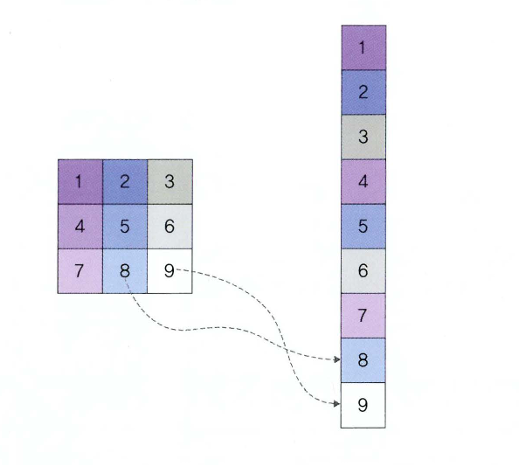

---




5.1.2 합성곱 신경망 구조

- 합성곱 신경망: 음성 인식, 이미지/영상 인식에서 주로 사용. 다차원 배열 데이터를 처리에 특화됨
  - 1. 입력층
    2. 합성곱층
    3. 풀링층
    4. 완전 연결층
    5. 출력층
  - 합성곱층과 풀링층을 거치며 입력 이미지의 주요 특성 벡터 추출 -> 완전연결층을 지나 1차원 벡터 변환 -> 출력층에서 활성화 함수(소프트맥스) 사용해 최종 결과 출력

  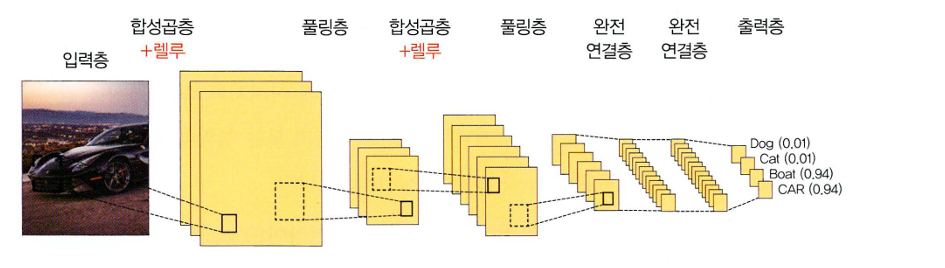




  

- **입력층**: 입력 이미지 데이터가 최조로 거치는 계층.
  - 이미지는 높이+너비+채널(그레이스케일=1, 컬러=3) 3차원 데이터.

- **합성곱층**: 입력데이터에서 측성 추출
  - 특성추출: 커널이나 필터 사용해 이미지의 모든 영역을 흝으며 특성 추출 --> 결과물은 특성 맵
  - 커널은 3x3, 5x5 크기, 스트라이트(간격)만큼 순차적 이동
  - 커널 3x3, 스트라이드=1일때 이동하면서 합성곱 연산 수행하는 과정:
    - 1. 입력 이미지에 3x3 필터 적용: 입력 이미지와 필터를 겹쳐 대응되는 숫자끼리 곱한 후 모두 더함
    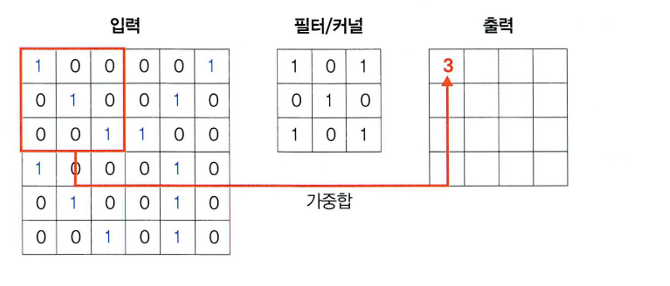

    - 2. 필터가 1만큼 이동
      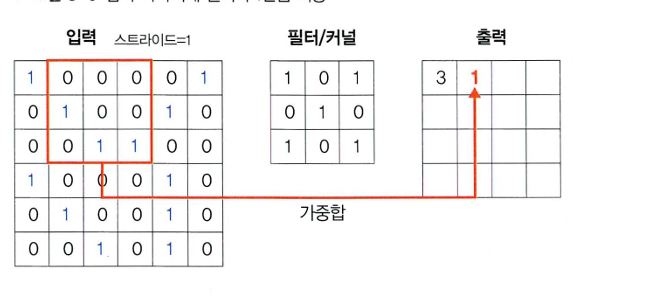
    - 3. 필터가 1만큼 두 번째 이동
      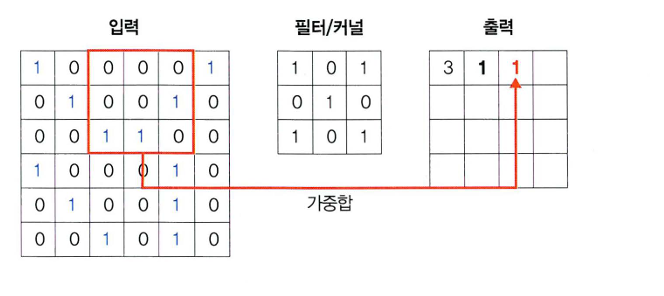
    - 4. 필터가 1만큼 세 번째 이동
      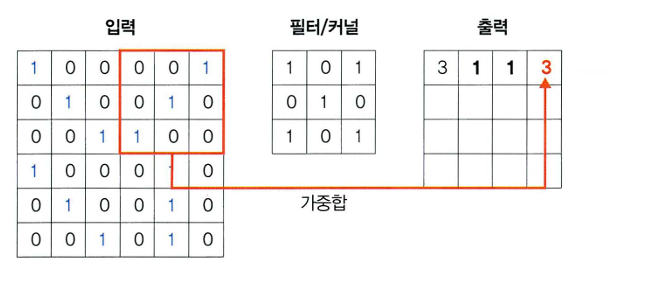
    - 5. 필터가 1만큼 네 번째 이동
      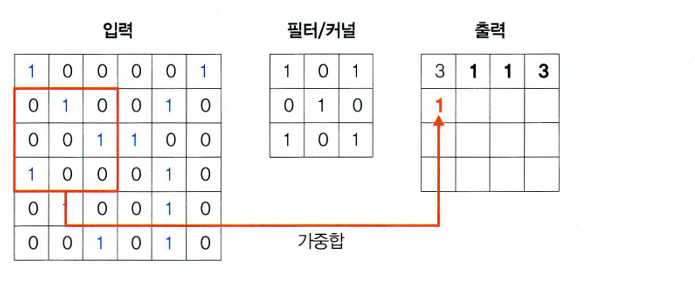
    - 6. 필터가 1만큼 마지막으로 이동
      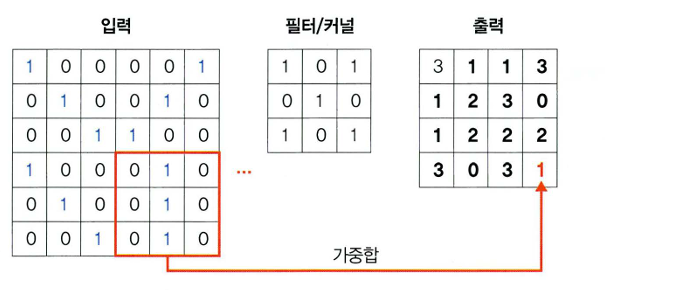
    - 새로운 특성 맵 만들어짐. 원본(6,6,1) -> (4,4,1)
  - 컬러 이미지의 합성곱: 필터 채널이 3이고 RGB 각각에 서로 다른 가중치로 합성곱을 적용 후 결과 더해야 함. 이외는 동일
    - 필터 채널이 3-> 필터가 세개 X, 필터는 하나
    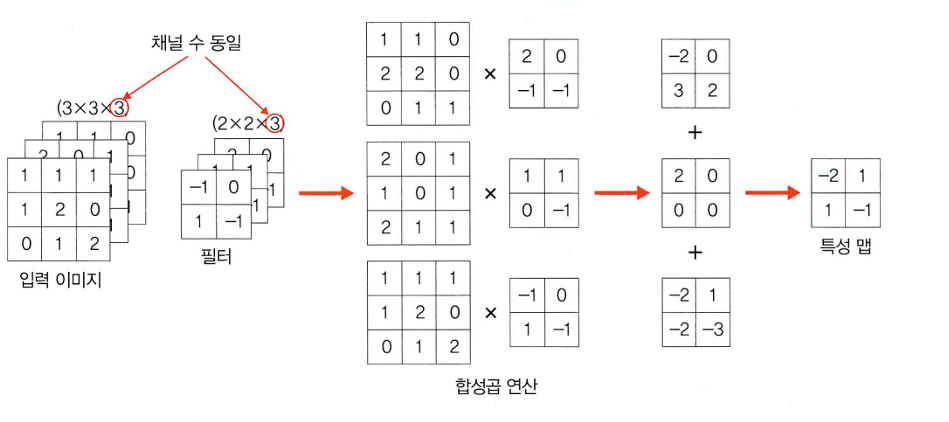
  - 필터 두개 이상이 합성곱: 필터 각각은 특성 추출 결과의 채널이 됨.
    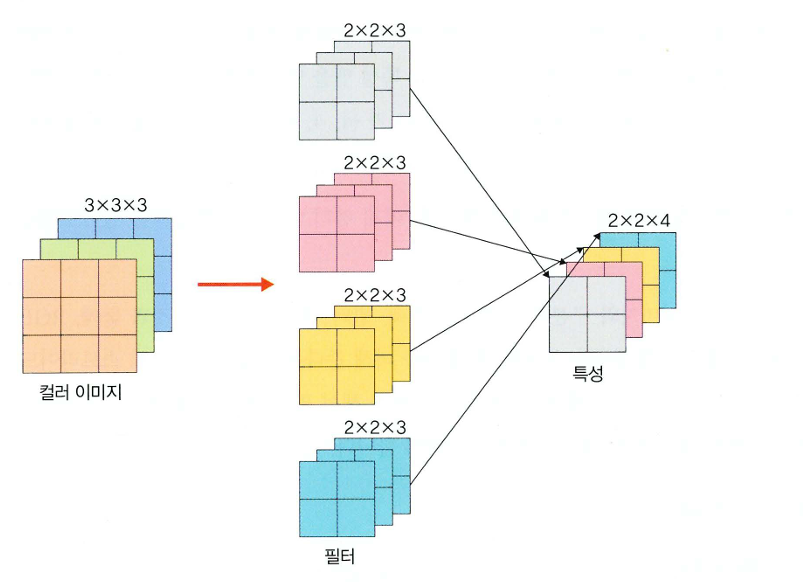

  > [요약]
    - 입력 데이터: $W_1 * H_1 * D_1$ (가로, 세로, 채널)  
    - 하이퍼 파라미터: 필터 개수(K), 필터 크기(F), 스트라이드(S), 패딩(P)
    - 출력 데이터:
  $$
    W_2 = (W_1 - F + 2P)/S+1,
    H_2 = (H_1 - F + 2P)/S+1,
    D_2 = K
  $$  

  


- **풀링층**: 합성곱층과 유사하게 특성 맵 차원을 다운 샘플링하여 연산량 감소, 주요 특성 벡터 추출
  - 최대 풀링: 대상 영역에서 최댓값 추출, 대부분의 합성곱 신경망에서 사용
  - 평균 풀링: 대상 영역에서 평균을 반환, 중요 가중치 값의 특성이 희미해질 수 있음
  - 최대 풀링 연산과정:
    - 1. 첫번째 최대 풀링 과정: 최댓값(3) 선택
      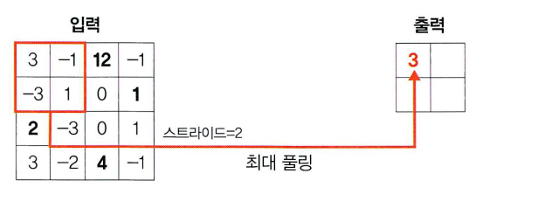
    - 2. 두번째 최대 풀링 과정: 최댓값(12) 선택
      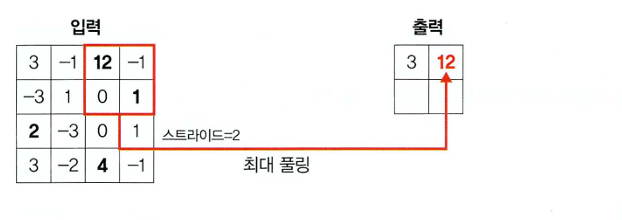
    - 3. 세번째 최대 풀링 과정: 최댓값(3) 선택
      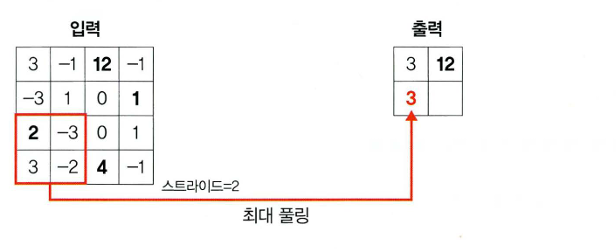
    - 4. 네번째 최대 풀링 과정: 최댓값(4) 선택
      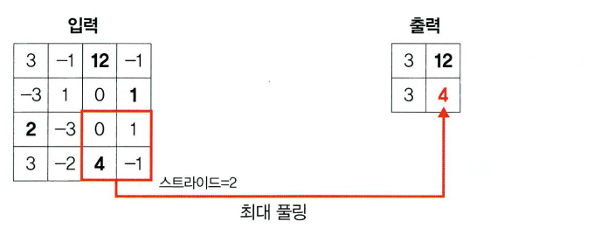
  - 평균 출링 계산과정: 각 필터의 평균으로 계산함(ex. 0 = (3+(-1)+(-3)+1)/4)
    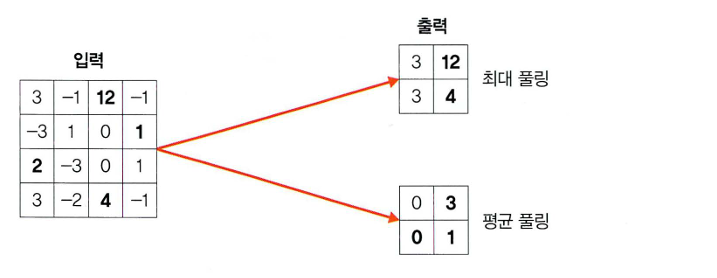

  > [요약]
    - 입력 데이터: $W_1 * H_1 * D_1$ (가로, 세로, 채널)  
    - 하이퍼 파라미터: 필터 크기(F), 스트라이드(S)
    - 출력 데이터:
  $$
    W_2 = (W_1 - F)/S+1,
    H_2 = (H_1 - F)/S+1,
    D_2 = D_1
  $$  

- **완전 연결층**: 합성곱층과 풀링층을 거치면서 차원 축소된 특성 맵 -> 완전연결층에서 이미지가 3차원 벡터에서 1차원 벡터로 펼쳐짐
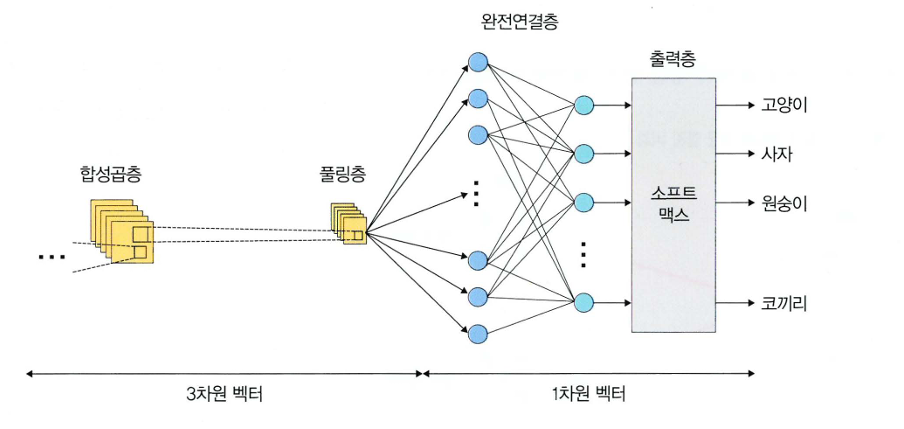

- **출력층**: 소프트맥스 활성화 함수 사용하여 입력받은 값을 0~1 사이의 값으로 출력.
  - 이미지가 각 레이블에 속할 확률 값이 출력됨. 가장 높은 확률 값의 레이블로 최종 값 선정

---

5.1.3 1D, 2D, 3D 합성곱

- 이동하는 방향의 수와 출력 형태에 따라 분류
- **1D 합성곱**: 필터가 시간을 축으로 좌우로만 이동
  - 입력(W)과 필터(k)에 대한 출력은 (W) 1D 배열. 그래프 곡선의 완화에 많이 사용
  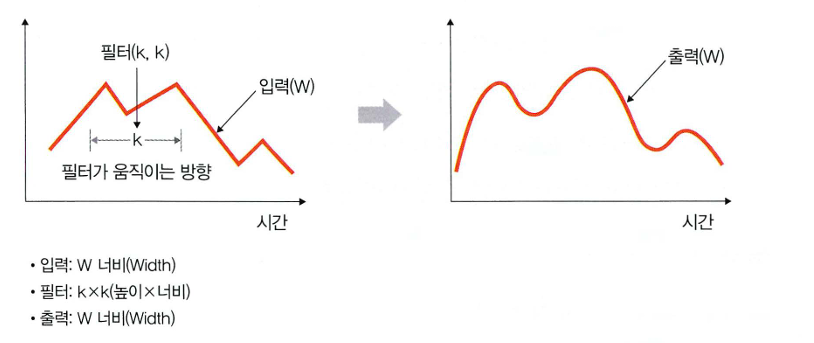

- **2D 합성곱**: 필터가 방향 두 개로 움직이는 형태. 입력(W, H)과 필터(k,k)에 대한 출력은 (W, H) 2D 행렬
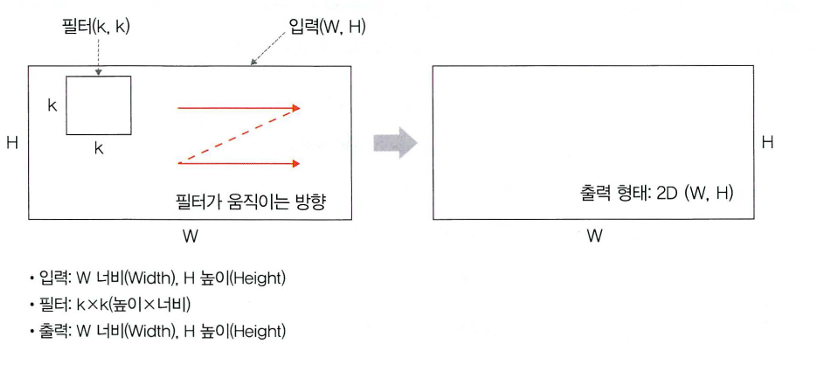

- **3D 합성곱**: 필터가 움직이는 방향이 세개. 입력(W, H, L)에 대해 필터(k,k,d)적용한 출력으로 (W, H, L) 3D 형태. d<L 유지 중요
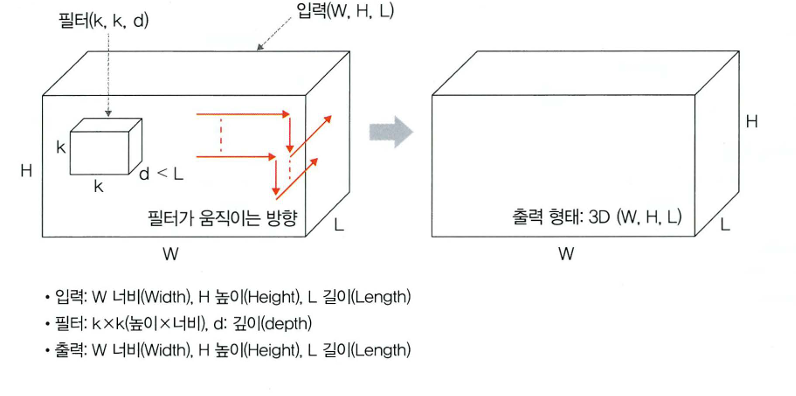




- **3D 입력을 갖는 2D 합성곱**: 입력이 3D 형태임에도 출력이 2D 행렬
  - 입력(W, H, L), 필터(k,k,L), 출력(W,L)
  - 필터에 대한 길이(L)가 입력 채널의 길이(L)과 같아야해 이런 형태가 생김.
  - LeNet-5, VGG
  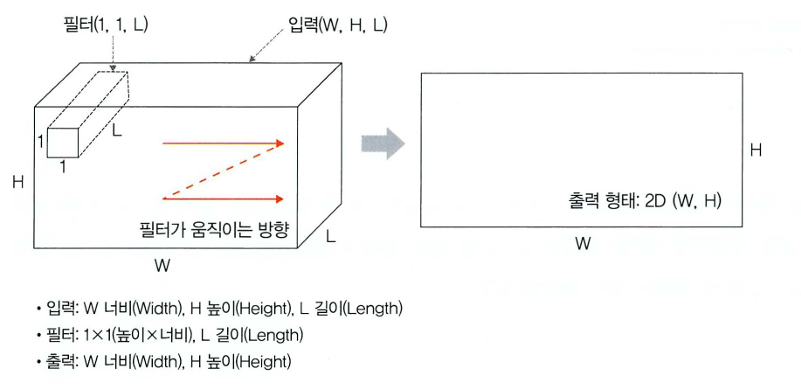

- **1X1 합성곱**: 3D 형태로 입력
  - 입력(W, H, L), 필터(1,1,L), 출력(W,H)
  - 채널 수를 조정해 연산량이 감소되는 효과
  - GoogleNet
  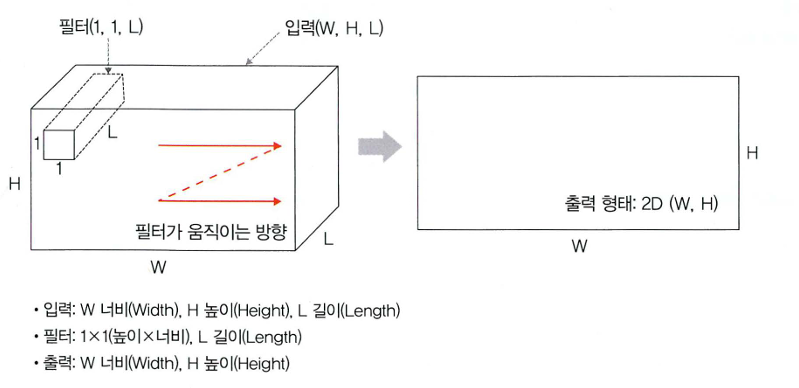